<a href="https://colab.research.google.com/github/feniltailor22/Feature-Engineering/blob/main/1)_Handling_missing_values_with_Mean_Median_Mode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Lifecycle of a Data Science Projects

1. Data Collection Strategy---from company side,3rd party APi's,Surveys,Surveys
2. Feature Engineering---Handling Missing Values

Why are their Missing values?? Survey--Depression Survey

1. They hesitate to put down the information
2. Survey informations are not that valid
3. Men--salary
4. Women---age
5. People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources

What are the different types of Missing Data?
##### **1. Missing Completely at Random, (MCAR) :** A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. **When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset.** In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('/content/titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#total null values in each feature column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Here, Age and Cabin may have relationship and resulted into missing values.
#That's why it is nor considered in Missing Completely At Random (MCAR) dataset.
#Example of Missing Completely At Random (MCAR) is Embarked feature as it has no relationship with Age and Cabin:

df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


**2. Missing Data Not At Random(MNAR):** Systematic missing Values There is absolutely **some relationship between the data missing and any other values**, observed or missing, within the dataset.

Here, Age and Cabin may have relationship and resulted into missing values. Hence, it will be cinsidered as Missing Data Not At Random (MNAR).

In [7]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [8]:
#Createing a new feature column 'Cabin_Null' and
#If the value is Null in Cabin than we will replace it with 1 else 0. 
df['Cabin_Null']= np.where(df['Cabin'].isnull(),1,0)

In [9]:
df['Cabin_Null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_Null, Length: 891, dtype: int64

In [10]:
#finding the percentage of Cabin_Null Values
df['Cabin_Null'].mean()

0.7710437710437711

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_Null'],
      dtype='object')

In [12]:
from numpy.core.numeric import NaN
df['Age_NonNull']= np.where(df['Age'].isnull(), 0, 1)

In [13]:
df['Age_NonNull']

0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: Age_NonNull, Length: 891, dtype: int64

In [14]:
#finding the percentage of Non-NaN Age values
df['Age_NonNull'].mean() 

0.8013468013468014

In [15]:
#Means 20% Age Values are Missing

In [16]:
#Checking whether the Survived person has provided the Cabin Info or not.
#0: the person has Not Survived. Hence, having no Cabin Info in dataset. Having more % of missing Info.
#1: The person has Survived. Although having their the Cabin Info.
 
df.groupby(['Survived'])['Cabin_Null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_Null, dtype: float64

**3. Missing At Random(MAR):**

Men---hide their salary    

Women---hide their age

### All the techniques of handling missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NaN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

**1. Mean/ Median /Mode imputation**

**When should we apply?**

Mean/Median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NaN with the most frequent occurance of the variables



In [17]:
df_new= pd.read_csv('/content/titanic_train.csv', usecols=['Age','Fare','Survived'])

In [18]:
df_new.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
df_new.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [20]:
df_new.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [21]:
#Filling the Age feature with its Median.
#we have not used Mean Value for filling NaN values because we may have Outliers.

median_age= df['Age'].median()
median_age

28.0

In [26]:
#Creating a function that can fill Nan Values with Median Value

def Impute_NaN(df,feature,median):
  df[feature+'_with_Median']= df[feature].fillna(value=median)

In [27]:
Impute_NaN(df_new, 'Age', median_age)

In [28]:
df_new.head()

,Survived,Age,Fare,Age_with_Median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [29]:
df_new.isnull().sum()

Survived             0
Age                177
Fare                 0
Age_with_Median      0
dtype: int64

In [31]:
df_new.isnull().mean()

Survived           0.000000
Age                0.198653
Fare               0.000000
Age_with_Median    0.000000
dtype: float64

In [32]:
#Checking the Standard_deviation of Age and Age_with_Median

print(df_new['Age'].std())
print(df_new['Age_with_Median'].std())

14.526497332334044
13.019696550973194


In [33]:
import matplotlib.pyplot as plt

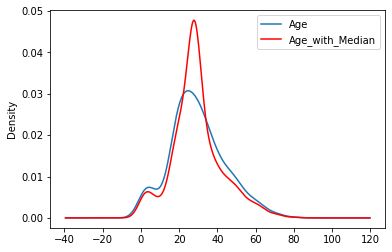

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_new['Age'].plot(kind='kde', ax=ax)
df_new.Age_with_Median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

**Advantages And Disadvantages of Mean/Median Imputation:**

**Advantages**

1. Easy to implement
2. Median is Robust to outliers
3. Faster way to obtain the complete dataset 

**Disadvantages**

1. Change or Distortion in the original variance
2. Impacts Correlation